# AI vs Real Image Detector (Internship Project)
Upload an image and the system will analyze it using simple ML-inspired features and display 4 graphs.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

## Upload Image

Saving Screenshot 2025-02-02 221233.png to Screenshot 2025-02-02 221233.png


(np.float64(-0.5), np.float64(492.5), np.float64(120.5), np.float64(-0.5))

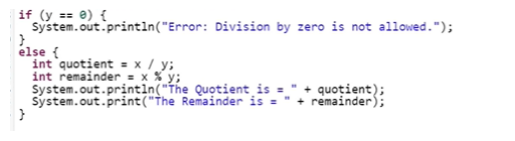

In [ ]:
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = Image.open(img_path).convert('RGB')
plt.imshow(img)
plt.axis('off')

## Feature Extraction

In [ ]:
img_gray = img.convert('L')
img_arr = np.array(img_gray)

# FFT
fft = np.fft.fft2(img_arr)
fft_shift = np.fft.fftshift(fft)
magnitude = np.abs(fft_shift)

high_freq_score = np.mean(magnitude)
texture_score = np.std(img_arr)
brightness_score = np.mean(img_arr)
edge_score = np.mean(np.abs(np.gradient(img_arr)))

## Prediction Logic

In [ ]:
scores = [high_freq_score, texture_score, brightness_score, edge_score]
labels = ['Frequency','Texture','Brightness','Edges']

ai_score = (high_freq_score*0.4 + texture_score*0.3 + edge_score*0.3)
real_score = (brightness_score*0.5 + texture_score*0.5)

prediction = 'AI Generated' if ai_score > real_score else 'Real Image'
print('Prediction:', prediction)

Prediction: AI Generated


## Graph 1 — Feature Scores

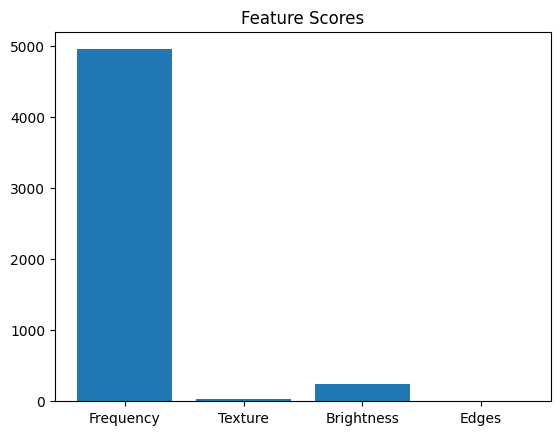

In [ ]:
plt.figure()
plt.bar(labels, scores)
plt.title('Feature Scores')
plt.show()

## Graph 2 — Confidence Comparison

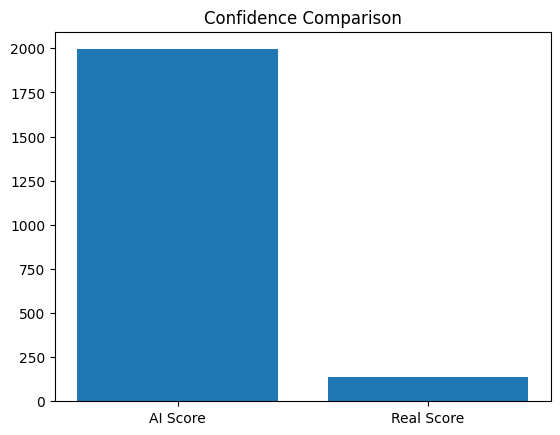

In [ ]:
plt.figure()
plt.bar(['AI Score','Real Score'], [ai_score, real_score])
plt.title('Confidence Comparison')
plt.show()

## Graph 3 — Probability Pie Chart

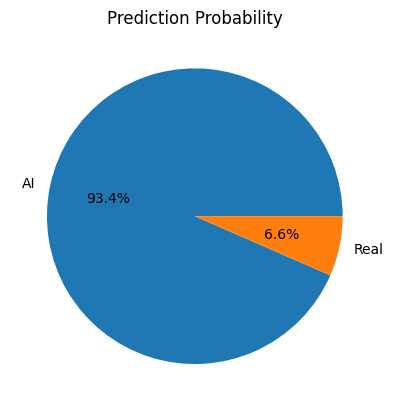

In [ ]:
total = ai_score + real_score
plt.figure()
plt.pie([ai_score/total, real_score/total], labels=['AI','Real'], autopct='%1.1f%%')
plt.title('Prediction Probability')
plt.show()

## Graph 4 — Histogram Analysis

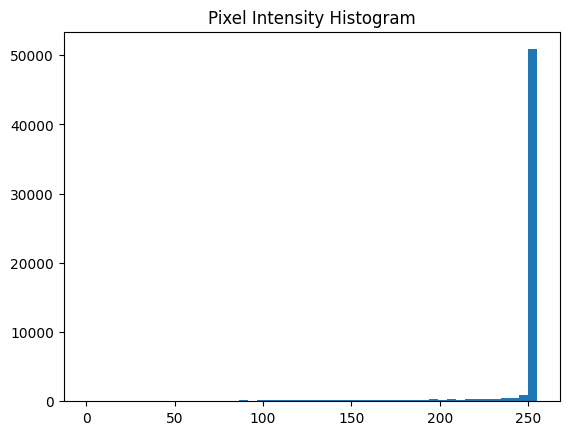

In [ ]:
plt.figure()
plt.hist(img_arr.flatten(), bins=50)
plt.title('Pixel Intensity Histogram')
plt.show()